<a href="https://colab.research.google.com/github/harshavardhansannithi/ARDS-using-Machine-learning/blob/main/ARDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [7]:
import pandas as pd

In [22]:
# Load your dataset (replace with your actual data)
dataset = pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")

In [23]:
type(dataset)

pandas.core.frame.DataFrame

In [24]:
dataset.shape

(309, 16)

In [25]:

dataset.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_RECRUITMENT
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [26]:
dataset.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_RECRUITMENT
218,F,70,1,1,1,2,2,1,2,1,2,2,2,1,1,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
227,M,71,1,2,2,1,2,1,2,2,2,2,1,2,1,YES
63,F,68,1,1,2,1,2,1,2,2,2,1,1,2,1,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES


In [27]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_RECRUITMENT       

In [29]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

GENDER:			age
AGE:			1: male, 0: female
SMOKING:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
YELLOW_FINGERS:			resting blood pressure
ANXIETY:			 serum cholestoral in mg/dl
PEER_PRESSURE:			fasting blood sugar > 120 mg/dl
CHRONIC DISEASE:			resting electrocardiographic results (values 0,1,2)
FATIGUE :			 maximum heart rate achieved
ALLERGY :			exercise induced angina
WHEEZING:			oldpeak = ST depression induced by exercise relative to rest
ALCOHOL CONSUMING:			the slope of the peak exercise ST segment
COUGHING:			number of major vessels (0-3) colored by flourosopy
SHORTNESS OF BREATH:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [30]:
dataset["LUNG_RECRUITMENT"].describe()

count     309
unique      2
top       YES
freq      270
Name: LUNG_RECRUITMENT, dtype: object

In [31]:
dataset["LUNG_RECRUITMENT"].unique()

array(['YES', 'NO'], dtype=object)

In [34]:
!pip install seaborn

In [35]:
import seaborn as sns

YES    270
NO      39
Name: LUNG_RECRUITMENT, dtype: int64


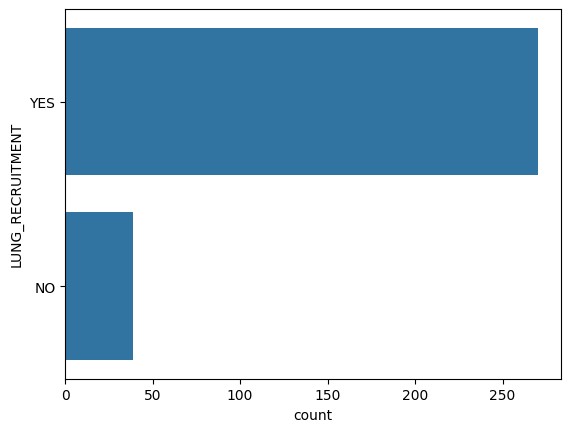

In [37]:
y = dataset["LUNG_RECRUITMENT"]

sns.countplot(y)


target_temp = dataset.LUNG_RECRUITMENT.value_counts()

print(target_temp)

In [38]:
print("Percentage of patience without lung recruitment problems: "+str(round(target_temp[0]*100/309,2)))
print("Percentage of patience with lung recruitment problems: "+str(round(target_temp[1]*100/309,2)))


Percentage of patience without lung recruitment problems: 87.38
Percentage of patience with lung recruitment problems: 12.62


In [40]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("LUNG_RECRUITMENT",axis=1)
target = dataset["LUNG_RECRUITMENT"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [41]:
X_train.shape

(247, 15)

In [42]:
X_test.shape

(62, 15)

In [43]:
Y_train.shape

(247,)

In [44]:
Y_test.shape

(62,)

In [45]:
#Model Fitting
from sklearn.metrics import accuracy_score

In [58]:
import pandas as pd

# Load the data
data = pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")

In [59]:
y_train = data["LUNG_RECRUITMENT"]

In [60]:
X_train = data.drop("LUNG_RECRUITMENT", axis=1)

In [68]:
# SVM Model
from sklearn.svm import SVC



In [69]:
print(SVC)

<class 'sklearn.svm._classes.SVC'>


In [72]:
print(X_train.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')


In [73]:
if 'LUNG_RECRUITMENT' not in X_train.columns:
    raise ValueError("The 'LUNG_RECRUITMENT' column is not present in the DataFrame.")

ValueError: The 'LUNG_RECRUITMENT' column is not present in the DataFrame.

In [74]:
categorical_columns = ['LUNG_RECRUITMENT']  # Update the list to match the actual column name

In [75]:
# Use the updated categorical_columns list
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Apply one-hot encoding to X_train and X_test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Instantiate and fit the SVM model
svm_clf = SVC(kernel='rbf')  # Experiment with different kernels and parameters
svm_clf.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_svm = svm_clf.predict(X_test_encoded)

ValueError: A given column is not a column of the dataframe